<a href="https://colab.research.google.com/github/nreddyabhinav/ML/blob/master/Python_Notebooks/univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount the Drive Frist
(If its done using Colab)

In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Import libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# Program starts Here

**Prepare Data :**

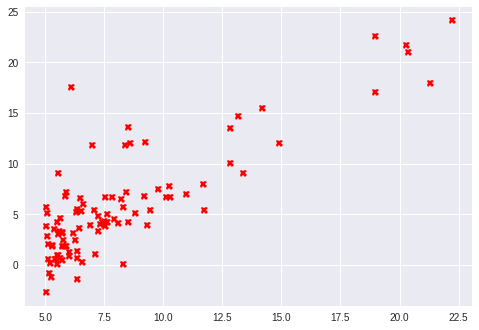

In [0]:

data = pd.read_csv("drive/My Drive/ColabNo/ex1data1.txt",header=None)
data = data.values
m = np.size(data[:,0])

plt.plot(data[:,0],data[:,1],'rX')
x= np.concatenate((np.ones((m,1)),np.reshape(data[:,0],(m,1))),axis=1)
y= data[:,1]
theta = np.zeros((2,1))
alpha = 0.01
iterations = 1500

**Cost Function : **

In [0]:

def cost(x,y, theta):
  c = np.sum((np.matmul(np.transpose(theta) ,np.transpose(x)) - y)**2)/(2*m)
  return c


#cost function test
t=[[-1],[2]]
print(t)
j= cost(x,y,t)
print("approx 54.24---------  %.2f"%(j))

[[-1], [2]]
approx 54.24---------  54.24


**Gradient descent :**

In [0]:
def gd(x, y, theta, a, iteration):
  temp0 = 0
  temp1 = 0
  Jc=np.zeros((iteration,1))
#   print(Jc)
  for i in range(0,iteration):
    temp0 = temp0 - (np.sum((np.matmul(np.transpose(theta) ,np.transpose(x)) - y)*np.transpose(x)[0,:]))*a/m
    temp1 = temp1 - (np.sum((np.matmul(np.transpose(theta) ,np.transpose(x)) - y)*np.transpose(x)[1,:]))*a/m
    theta[0][0] = temp0
    theta[1][0] = temp1
    Jc[i] = cost(x,y,theta)
#   print(Jc)
  return theta,Jc

In [0]:
theta,J = gd(x,y,theta,alpha,iterations)
print(theta)
print("exected -3.6303\n  1.1664\n\n")
print(J[-10:,0])

[[-3.63029144]
 [ 1.16636235]]
exected -3.6303
  1.1664


[4.48360007 4.4835762  4.48355241 4.4835287  4.48350508 4.48348155
 4.4834581  4.48343473 4.48341145 4.48338826]


**Prediction :**

profit for 35000 population  --> 0.451977
profit for 70000 population  --> 4.534245


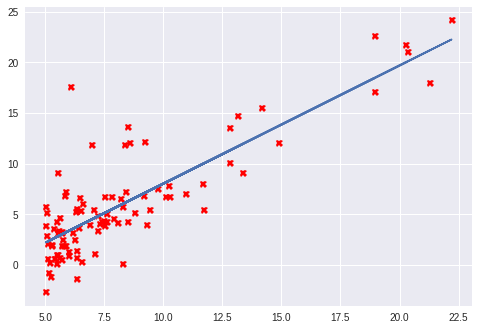

In [0]:
print("profit for 35000 population  --> %f"%(np.matmul([1,3.5],theta)))
print("profit for 70000 population  --> %f"%(np.matmul([1,7],theta)))
plt.plot(data[:,0],data[:,1],'rX')
plt.plot(x[:,1],np.matmul(x,theta),'-')


**Visualization :**

In [0]:
t0 = np.linspace(-10,10,num=100)
t1 = np.linspace(-1,4,num=100)
jv = np.zeros((len(t0),len(t1)))

for i in range(0,len(t0)):
  for j in range(0,len(t1)):
    t = [[t0[i]],[t1[j]]]
    jv[i,j] = cost(x,y,t)
jv= np.transpose(jv)

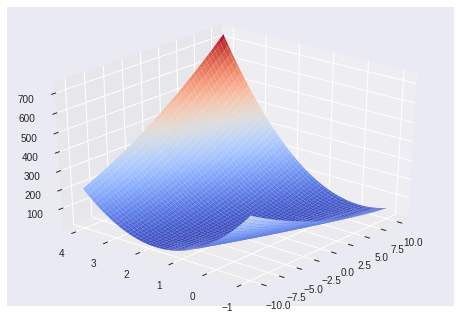

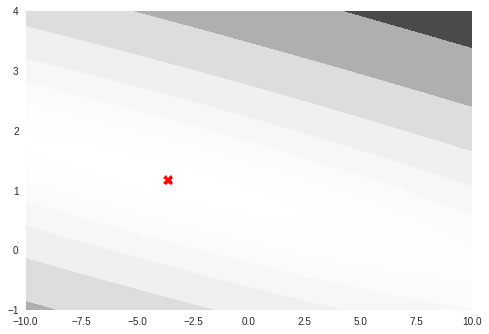

In [0]:
X,Y=np.meshgrid(t0, t1)
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,jv,cmap=cm.coolwarm)
ax.view_init(30,-140 )

plt.figure(2)

plt.contourf(X,Y,jv,np.logspace(-2,3,num=20))
plt.plot(theta[0,0],theta[1,0],'rX',markersize='10')



# Testing 

In [0]:
# from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# import numpy as np


# fig = plt.figure()
# ax = fig.gca(projection='3d')

# # Make data.
# X = np.arange(-5, 5, 0.25)
# Y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(X, Y)
# R = np.sqrt(X**2 + Y**2)
# Z = np.sin(R)

# # Plot the surface.
# surf = ax.plot_surface(t0, t1, jv, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)
# # ax.view_init(0,90 )
# # Customize the z axis.
# # ax.set_zlim(-1.01, 1.01)
# # ax.zaxis.set_major_locator(LinearLocator(10))
# # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# # Add a color bar which maps values to colors.
# # fig.colorbar(surf, shrink=0.5, aspect=5)

# # plt.show()


In [0]:
# def f(t):
#     'A damped exponential'
#     s1 = np.cos(2 * np.pi * t)
#     e1 = np.exp(-t)
#     return s1 * e1


# t1 = np.arange(0.0, 5.0, .2)

# l = plt.plot(t1, f(t1), 'ro')
# l=plt.plot(3,0.6,'ro')
# # plt.setp(l, markersize=30)
# # plt.setp(l, markerfacecolor='C0')

# plt.show()

In [0]:
# theta0_vals = np.linspace(-10, 10, num=100)
# theta1_vals = np.linspace(-1, 4,  num=100)

# # initialize J_vals to a matrix of 0's
# J_vals = np.zeros((100,100))

# # Fill out J_vals
# for i in range(0,100):
#     for j in range(0,100):
# 	     t = [[theta0_vals[i]],[theta1_vals[j]]]
# 	     J_vals[i,j] = cost(x, y, t)
    



# # % Because of the way meshgrids work in the surf command, we need to
# # % transpose J_vals before calling surf, or else the axes will be flipped
# J_vals = np.transpose(J_vals)
# print('j vals')
# print(J_vals)
# # % Surface plot
# # figure;
# # surf(theta0_vals, theta1_vals, J_vals)
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# # ax = fig.add_subplot(111, projection='3d')
# X,Y=np.meshgrid(theta0_vals, theta1_vals)
# ax.plot_surface(X,Y,J_vals,cmap=cm.coolwarm)
# ax.view_init(30,230 )

In [0]:
# !ls drive/'My Drive'/ColabNo/

In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
# ym = np.asmatrix(data[:,1])
# mm = np.matmul(np.transpose(theta) , np.reshape(x[0,:],(2,1))) - data[:,1]
# sq = mm * mm
# print(mm)
# print(sq)
# print(np.sum(sq)/(2*m))

In [0]:
# xm = np.asmatrix(x)
# thm = np.asmatrix(theta)
# #print(xm[:,1].T)

# mul = np.sum(np.square((thm.T * xm.T) - y))/m
# #print(np.square(np.asmatrix([1, 2, 4, 5])))
# print(mul)

In [0]:

# print(m)
#print(data[1,1])

#print(data[:,0].size)
#x = np.concatenate((np.ones((np.size(data[:,1]),1)),data[:,0].T),axis=1)

#x = np.ones((22,1))
#x = np.ones((m,1))
#y = np.zeros((np.size(data[:,1]),1))
#print(data)
#print(data[:,0])
#y = data[:,0].T
#print(np.reshape(y,(96,1)))
#print(x)




#print(theta)
#print(x)
# print(x[0,:])
# print(np.transpose(x) )
# print(np.reshape(x,(2,m)))
#for i in range(0,m+1):
# mul = np.dot(np.transpose(theta) ,np.transpose(x))
# print(mul)